# Case Housing Prices

## Etapas - 2a aula

- Solução Proposta para Inspeção Inicial, Limpeza de Dados e EDA (35 min)
- Modelagem e Avaliaçao do Modelo - Parte I (20 min) 
- Intervalo (15 min)
- Modelagem e Avaliação do Modelo - Parte II (40 min)
- Solução Proposta para a Modelagem e Avaliaçao do Modelo (20 min)

# Apresentação do Case

<br>
<img src="https://thumbor.forbes.com/thumbor/fit-in/1200x0/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F1139584112%2F0x0.jpg" width="950" />
<br>

No nosso exemplo vamos modelar uma regressão para explicar os preços das casas nos EUA.

    
Features:
- **price** - The last price the house was sold for
- **num_bed** - The number of bedrooms
- **num_bath** - The number of bathrooms (fractions mean the house has a toilet-only or shower/bathtub-only bathroom)
- **size_house** (includes basement) - The size of the house
- **size_lot** - The size of the lot
- **num_floors** - The number of floors
- **is_waterfront** - Whether or not the house is a waterfront house (0 means it is not a waterfront house whereas 1 means that it is a waterfront house)
- **condition** - How worn out the house is. Ranges from 1 (needs repairs all over the place) to 5 (the house is very well maintained)
- **size_basement** - The size of the basement
- **year_built** - The year the house was built
- **renovation_date** - The year the house was renovated for the last time. 0 means the house has never been renovated
- **zip** - The zip code
- **latitude** - Latitude
- **longitude** - Longitude
- **avg_size_neighbor_houses** - The average house size of the neighbors
- **avg_size_neighbor_lot** - The average lot size of the neighbors

O dataset foi simplificado para a aula (algumas features foram excluídas). Dados originais disponíveis no Kaggle [clicando aqui](https://www.kaggle.com/harlfoxem/housesalesprediction)

--------------

Daremos algumas dicas e sugestões do que inspecionar/analisar, mas podem pensar em em outras questões. No início da próxima aula, apresentaremos a solução proposta para essa primeira etapa.
Na etapa de planejamento, tentem se lembrar de funções, bibliotecas que vocês podem utilizar para realizar essas etapas;

# Inspeção Inicial

In [1]:
# Ler todas as bibliotecas aqui
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# constantes
DATA_RAW = 'house_pricing.csv'

In [3]:
# Ler os dados aqui
df_houses = pd.read_csv(DATA_RAW, sep=',')

In [4]:
df_houses.head()

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,239000,3,1.0,1510,15022,1.0,0,3,0,1962,0,98003,47.330433,-122.303609,1510,12970
1,1260000,3,3.5,3220,3960,2.0,0,3,460,1991,0,98116,47.590933,-122.384230,3080,4444
2,414500,3,1.0,1050,6002,1.0,0,3,210,1941,0,98115,47.698761,-122.316010,1180,6003
3,252500,3,2.5,1780,7192,1.0,0,4,530,1974,0,98031,47.409319,-122.173484,1870,8500
4,389000,3,1.0,1330,3740,1.5,0,3,0,1903,0,98118,47.550242,-122.274232,1330,5053


- Quantidade de linhas, quantidade de colunas
- Titulo das colunas e o que elas significam (comparar com a descrição inicial. Elas fazem sentido?)
- Tipo dos dados, não apenas se são numéricas ou texto. O que elas são de fato. São numéricas mas deveriam ser categorias ou datetime?
- Visão geral dos valores que as variáveis podem assumir (análise de inconsistências nos dados)
- Duplicatas (linhas e colunas)?
- Missing Values

Codificar o planejamento e Registrar o que foi encontrado em forma de texto, como se estivesse fazendo um relatório sobre seus achados.

In [5]:
# Checando a quantidade de linhas e colunas
print(f'O Conjunto de Dados possui: {df_houses.shape[0]} linhas e {df_houses.shape[1]} colunas')

O Conjunto de Dados possui: 1845 linhas e 16 colunas


In [6]:
# checando o tipo dos dados
df_houses.dtypes

price                         int64
num_bed                       int64
num_bath                    float64
size_house                    int64
size_lot                      int64
num_floors                  float64
is_waterfront                 int64
condition                     int64
size_basement                 int64
year_built                    int64
renovation_date               int64
zip                           int64
latitude                    float64
longitude                   float64
avg_size_neighbor_houses      int64
avg_size_neighbor_lot         int64
dtype: object

- **price** - Ainda que esperássemos um tipo float, o tipo int também cabe nessa variável.
- **num_bed** - O tipo inteiro é apropriado
- **num_bath** - Inicialmente, parece estranho, mas essa variável estar como float reflete algo relacionado ao negócio (forma como os banheiros são vistos no USA)
- **size_house** - O tipo inteiro é apropriado
- **size_lot** - O tipo inteiro é apropriado
- **num_floors** - O tipo float parece estranho, mas pode ser a mesma lógica de num_bath.
- **is_waterfront** - Essa variável é qualitativa. Assim, poderia ser definida como object. Porém, notamos que é uma variável do tipo dummy, ou seja, já foi convertida para número e pode ser utilizada na modelagem
- **condition** - Essa variável poderia vir como object, já que traz uma característica qualitativa. Porém, o próprio dataset já a trata como numérica. Assim, vou admitir que as ditâncias entre os níveis qualidade do imóvel estão igualmente espaçados e tem a referência 1. Ou seja, é uma varíavel ratio e podemos usá-la da forma que está
- **size_basement** - O tipo inteiro é apropriado
- **year_built** - O tipo inteiro é apropriado
- **renovation_date** - O tipo inteiro é apropriado
- **zip** - Aqui poderia ser inteiro ou object, podemos considerar como uma variável qualitativa.
- **latitude** - O tipo float é apropriado
- **longitude** - O tipo float é apropriado
- **avg_size_neighbor_houses** - O tipo inteiro é apropriado
- **avg_size_neighbor_lot** - O tipo inteiro é apropriado


In [7]:
# vamos checar se há alguma inconsistência nas variáveis
df_houses.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1845.0,557127.039024,403208.183409,81000.000000,325000.000000,457000.000000,665000.000000,7.062500e+06
num_bed,1845.0,3.379946,0.939221,0.000000,3.000000,3.000000,4.000000,9.000000e+00
num_bath,1845.0,2.140108,0.785074,0.000000,1.750000,2.250000,2.500000,6.750000e+00
size_house,1845.0,2128.444986,955.754345,410.000000,1440.000000,1950.000000,2620.000000,1.004000e+04
size_lot,1845.0,15642.503523,41323.934402,649.000000,5100.000000,7700.000000,11060.000000,1.024068e+06
num_floors,1845.0,1.518970,0.549520,1.000000,1.000000,1.500000,2.000000,3.500000e+00
is_waterfront,1845.0,0.014092,0.117903,0.000000,0.000000,0.000000,0.000000,1.000000e+00
condition,1845.0,3.382114,0.634172,1.000000,3.000000,3.000000,4.000000,5.000000e+00
size_basement,1845.0,290.643902,461.995804,0.000000,0.000000,0.000000,550.000000,4.820000e+03
year_built,1845.0,1971.820054,29.097993,1900.000000,1952.000000,1976.000000,1997.000000,2.015000e+03


- Valores Negativos: O único valor negativo é de longitude e é aceitável.

- Zeros: Vemos que, além das variáveis is_waterfront, size_basement e renovation_date que, em tese, poderiam admitir tais valores, de acordo com a descrição dos dados, as variaveis num_bed e num_bath também aparecem com valores zero. Ou seja, isso significa que existem casas com 0 banheiros e 0 quartos?????

In [8]:
# Checando valores únicos nas variáveis de range limitado e classes
list_unique_check = ['is_waterfront', 'condition', 'zip']
for col in list_unique_check:
    unique_values = df_houses[col].unique()
    print(f'A coluna {col} possui {len(unique_values)} valores distintos, que são: {unique_values}')

A coluna is_waterfront possui 2 valores distintos, que são: [0 1]
A coluna condition possui 5 valores distintos, que são: [3 4 5 2 1]
A coluna zip possui 70 valores distintos, que são: [98003 98116 98115 98031 98118 98103 98023 98042 98112 98075 98117 98058
 98002 98146 98034 98038 98133 98125 98168 98004 98005 98056 98053 98029
 98119 98052 98028 98033 98030 98199 98001 98109 98072 98166 98155 98007
 98077 98027 98055 98006 98107 98188 98008 98126 98144 98011 98177 98136
 98032 98059 98070 98019 98198 98102 98065 98092 98022 98178 98106 98040
 98105 98010 98074 98122 98045 98039 98024 98108 98014 98148]


- Valores Únicos: De fato as variáveis citadas possuem os valores únicos descritos no início do problema. Ja a variável zip, como esperado, possui diversos possiveis valores.

In [9]:
# Checando valores atípicos
df_houses.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1845.0,557127.039024,403208.183409,81000.000000,325000.000000,457000.000000,665000.000000,7.062500e+06
num_bed,1845.0,3.379946,0.939221,0.000000,3.000000,3.000000,4.000000,9.000000e+00
num_bath,1845.0,2.140108,0.785074,0.000000,1.750000,2.250000,2.500000,6.750000e+00
size_house,1845.0,2128.444986,955.754345,410.000000,1440.000000,1950.000000,2620.000000,1.004000e+04
size_lot,1845.0,15642.503523,41323.934402,649.000000,5100.000000,7700.000000,11060.000000,1.024068e+06
num_floors,1845.0,1.518970,0.549520,1.000000,1.000000,1.500000,2.000000,3.500000e+00
is_waterfront,1845.0,0.014092,0.117903,0.000000,0.000000,0.000000,0.000000,1.000000e+00
condition,1845.0,3.382114,0.634172,1.000000,3.000000,3.000000,4.000000,5.000000e+00
size_basement,1845.0,290.643902,461.995804,0.000000,0.000000,0.000000,550.000000,4.820000e+03
year_built,1845.0,1971.820054,29.097993,1900.000000,1952.000000,1976.000000,1997.000000,2.015000e+03


- Valores Atípicos: Na análise de máximos e mínimos, não observamos nenhum valor atípicos.

In [10]:
# checando duplicadas nas linhas
print(f'Temos {df_houses.duplicated().sum()} linhas duplicadas')

Temos 0 linhas duplicadas


In [11]:
# checando duplicadas nas colunas
print(f'Temos {df_houses.T.duplicated().sum()} colunas duplicadas')

Temos 0 colunas duplicadas


- Duplicatas: Não foram encontradas nem duplicatas nas linhas nem nas colunas.

In [12]:
# checando missing values
df_houses.isna().sum()

price                       0
num_bed                     0
num_bath                    0
size_house                  0
size_lot                    0
num_floors                  0
is_waterfront               0
condition                   0
size_basement               0
year_built                  0
renovation_date             0
zip                         0
latitude                    0
longitude                   0
avg_size_neighbor_houses    0
avg_size_neighbor_lot       0
dtype: int64

- Missing Values: Sem missing values no dataset

# Análise Exploratória de Dados (EDA)

Seria interessante se você:
- Estudasse as distribuições das variáveis (histogramas, boxplots, Quartis, Valor Máximo e Mínimo)
- Estudasse as relações entre as variáveis envolvidas (gráficos de dispersão, histogramas, boxplots, testes de correlação e associação, entre outros)
- Levantasse questionamentos sobre os problemas (levante hipóteses sobre os dados e tente respondê-las usando suas análises)

Detalhe: Antes de iniciar a análise exploratória, dividam os dados em treino e teste. 

In [13]:
df_train_houses, df_test_houses = train_test_split(df_houses, train_size=0.7, random_state=123)

De agora em diante lidaremos apenas com o nosso conjunto de treinamento.

**Dica: Revisitem Notebooks de aulas anteriores para utilizar os codes que desenvolvemos.**

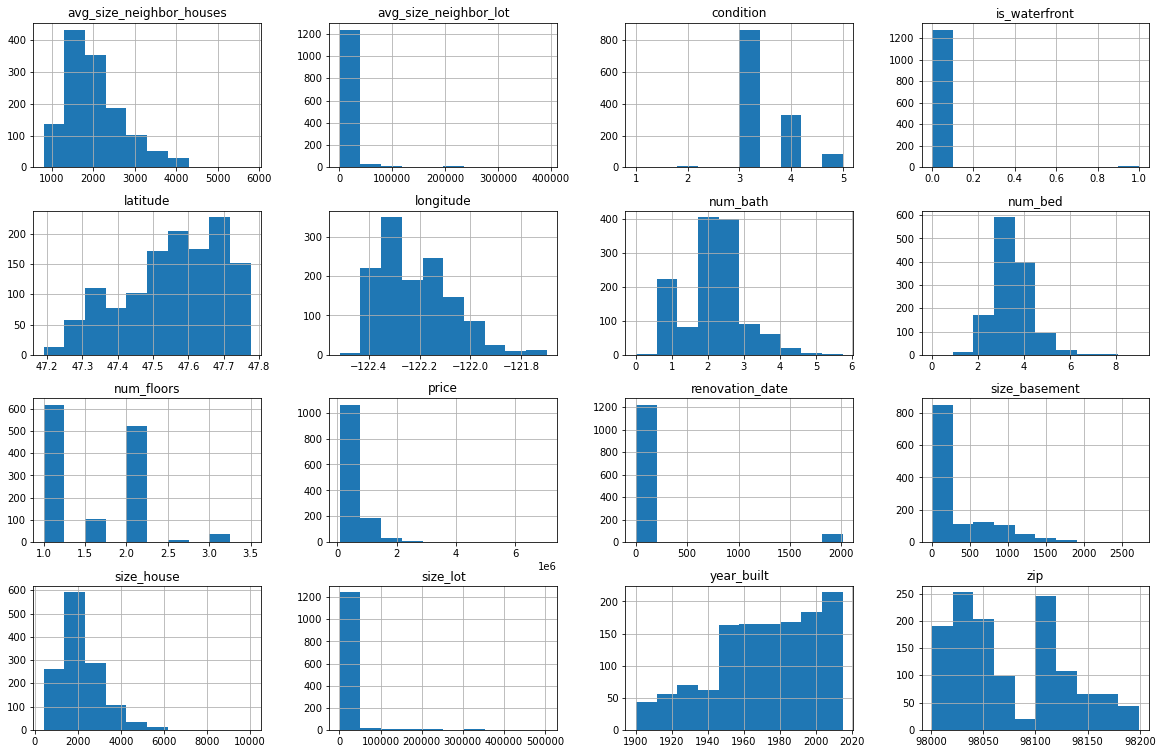

In [14]:
# Estudo das distribuções das variáveis
df_train_houses.hist(figsize=(20,13));

Nossa variável resposta, price, é assimétrica. Poderemos propor uma transformação para ela.

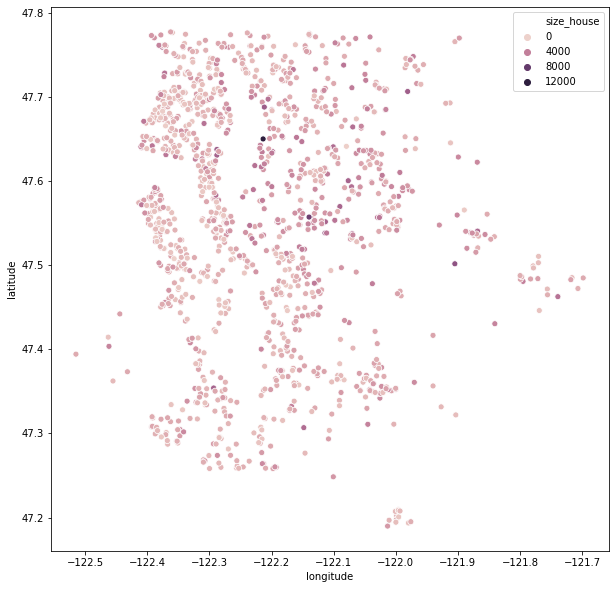

In [15]:
# H1: Há alguma relação entre a geografia e o tamanho das casas?
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_houses.longitude, y=df_train_houses.latitude, hue=df_train_houses.size_house);
plt.show()

Como temos uma calda alongada na variável size_house, vamos aplicar um log e observar o gráfico novamente;

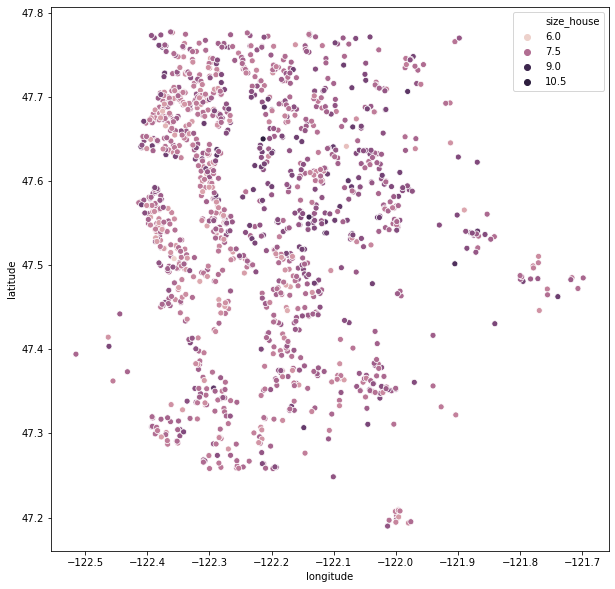

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_houses.longitude, y=df_train_houses.latitude, hue=np.log(df_train_houses.size_house));
plt.show()

Parece haver maior densidade de de casas maiores mais ao centro.

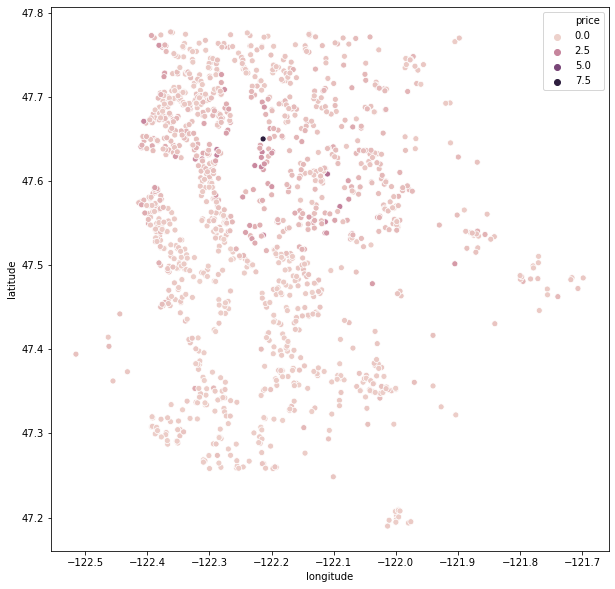

In [17]:
# H1: Há alguma relação entre a geografia e o preço das casas?
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_houses.longitude, y=df_train_houses.latitude, hue=df_train_houses.price);
plt.show()

Pelo mesmo motivo da variável size_house, vamos aplicar o log

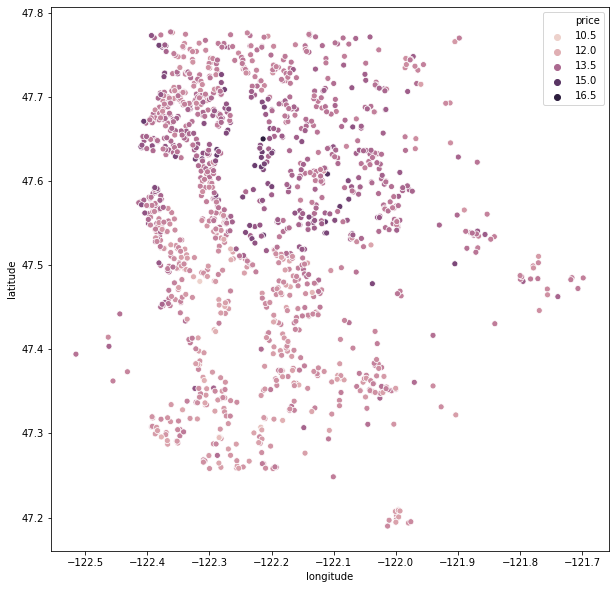

In [18]:
# H2: Há alguma relação entre a geografia e o preço das casas
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_houses.longitude, y=df_train_houses.latitude, hue=np.log(df_train_houses.price))
plt.show()

As casas mais caras parecem estar mais localizadas ao centro, coincidindo com a informação de tamanho.

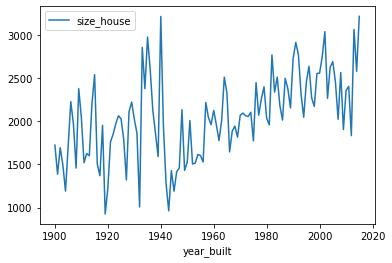

In [19]:
# H2: Casas mais velhas são maaiores e mais centrais
df_train_houses.pivot_table(values='size_house', columns='year_built',aggfunc='mean').T.plot()
plt.show()

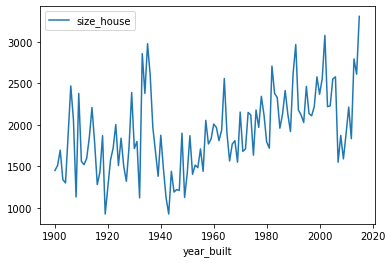

In [20]:
df_train_houses.pivot_table(values='size_house', columns='year_built',aggfunc='median').T.plot()
plt.show()

Na verdade, as casas tem aumentado de tamanho ao longo dos anos.

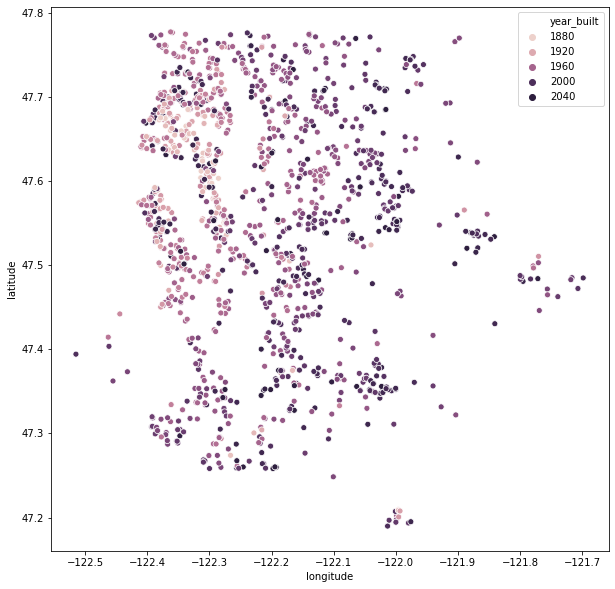

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_houses.longitude, y=df_train_houses.latitude, hue=df_train_houses.year_built);
plt.show()

As casas mais antigas se concentram mais no canto superior esquerdo. É um indício de uma área mais antiga da cidade, a partir de onde a cidade cresceu;

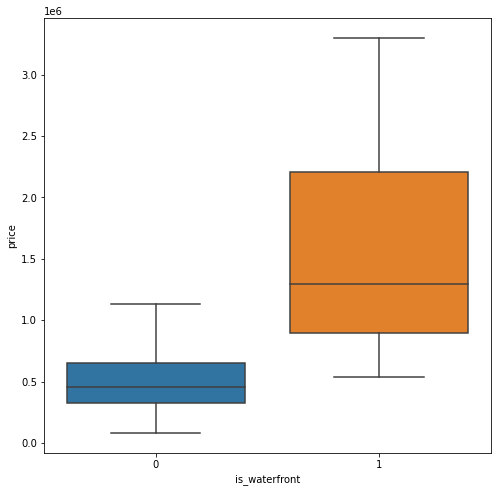

In [22]:
# H3: Casas waterfront são mais caras e mais afastadas
plt.figure(figsize=(8,8))
sns.boxplot(x='is_waterfront', y='price', data=df_train_houses, showfliers=False)
plt.show()

In [23]:
is_waterfront_true_price = df_train_houses.loc[df_train_houses['is_waterfront']==1, ['price']]
is_waterfront_false_price = df_train_houses.loc[df_train_houses['is_waterfront']==0, ['price']]

In [24]:
# test t de duas amostras
scipy.stats.ttest_ind(is_waterfront_true_price, is_waterfront_false_price, equal_var=False)

Ttest_indResult(statistic=array([3.18538644]), pvalue=array([0.00660206]))

A média de preço é maior para casas waterfront. 

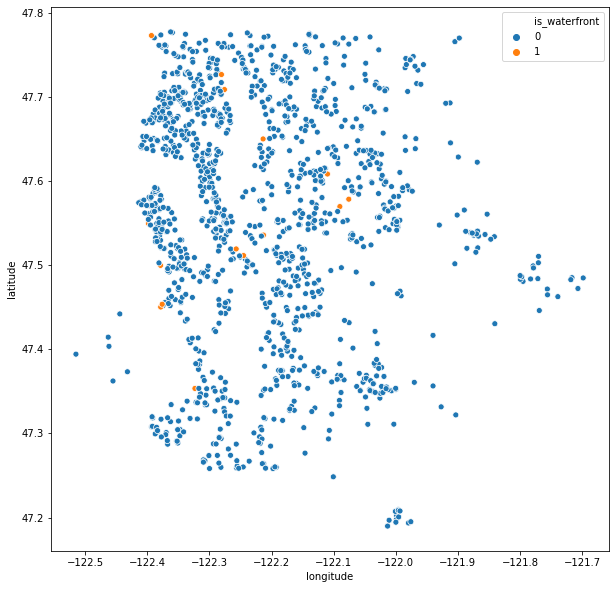

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_houses.longitude, y=df_train_houses.latitude, hue=df_train_houses.is_waterfront);
plt.show()

Esperávamos que as casas waterfront fossem mais afastadas, mas esse padrão não fica evidente. Pesquisando, descobrimos que casas waterfront são aquelas que possuem qualquer coisa de água na frente.  OU seja, não precisa ser de frente para praia, rio ou outra coisa necessariamente. É algo que ajuda na ornamentação da casa.

In [26]:
# medindo e testando as correlações
df_train_houses.corr()['price'].sort_values(ascending=True)

zip                        -0.040757
longitude                   0.002704
year_built                  0.006759
avg_size_neighbor_lot       0.061243
condition                   0.067655
size_lot                    0.114703
num_floors                  0.206018
renovation_date             0.214391
num_bed                     0.288304
latitude                    0.305275
is_waterfront               0.346088
size_basement               0.408339
num_bath                    0.516932
avg_size_neighbor_houses    0.588096
size_house                  0.731971
price                       1.000000
Name: price, dtype: float64

In [27]:
num_cols = df_train_houses.drop('is_waterfront', axis=1).columns.tolist()

In [32]:
correlation_features = []
for col in num_cols:
    cor, p = scipy.stats.pearsonr(df_train_houses[col], df_train_houses['price'])
    if p <= 0.05:
        print(f'p-value: {p},  correlation: {cor}')
        print(f'Existe correlação diferente de zero entre {col} e price.')
        print('--'*30)
        correlation_features.append(col)


    else:
        print(f'p-value: {p},  correlation: {cor}')
        print(f'Não existe correlação diferente de zero entre {col} e price.')
        print('--'*30)
              

p-value: 0.0,  correlation: 1.0
Existe correlação diferente de zero entre price e price.
------------------------------------------------------------
p-value: 3.925789712182652e-26,  correlation: 0.28830382026202594
Existe correlação diferente de zero entre num_bed e price.
------------------------------------------------------------
p-value: 4.0573037356536746e-89,  correlation: 0.516932328950743
Existe correlação diferente de zero entre num_bath e price.
------------------------------------------------------------
p-value: 4.834977119804647e-217,  correlation: 0.7319711564277762
Existe correlação diferente de zero entre size_house e price.
------------------------------------------------------------
p-value: 3.611896772198568e-05,  correlation: 0.114703433369587
Existe correlação diferente de zero entre size_lot e price.
------------------------------------------------------------
p-value: 7.690747618132113e-14,  correlation: 0.20601847018220004
Existe correlação diferente de zero en

In [33]:
for col in num_cols:
    cor, p = scipy.stats.spearmanr(df_train_houses[col], df_train_houses['price'])
    if p <= 0.05:
        print(f'p-value: {p},  correlation: {cor}')
        print(f'Existe correlação diferente de zero entre {col} e price.')
        print('--'*30)
    else:
        print(f'p-value: {p},  correlation: {cor}')
        print(f'Não existe correlação diferente de zero entre {col} e price.')
        print('--'*30)
              

p-value: 0.0,  correlation: 0.9999999999999999
Existe correlação diferente de zero entre price e price.
------------------------------------------------------------
p-value: 6.551052073274742e-36,  correlation: 0.33819943032111327
Existe correlação diferente de zero entre num_bed e price.
------------------------------------------------------------
p-value: 1.872577377385897e-85,  correlation: 0.5075275100118686
Existe correlação diferente de zero entre num_bath e price.
------------------------------------------------------------
p-value: 5.322534183133271e-173,  correlation: 0.6758295223714146
Existe correlação diferente de zero entre size_house e price.
------------------------------------------------------------
p-value: 0.00010789316825990765,  correlation: 0.10755837763532168
Existe correlação diferente de zero entre size_lot e price.
------------------------------------------------------------
p-value: 1.346686896601028e-26,  correlation: 0.2909078539515973
Existe correlação dif

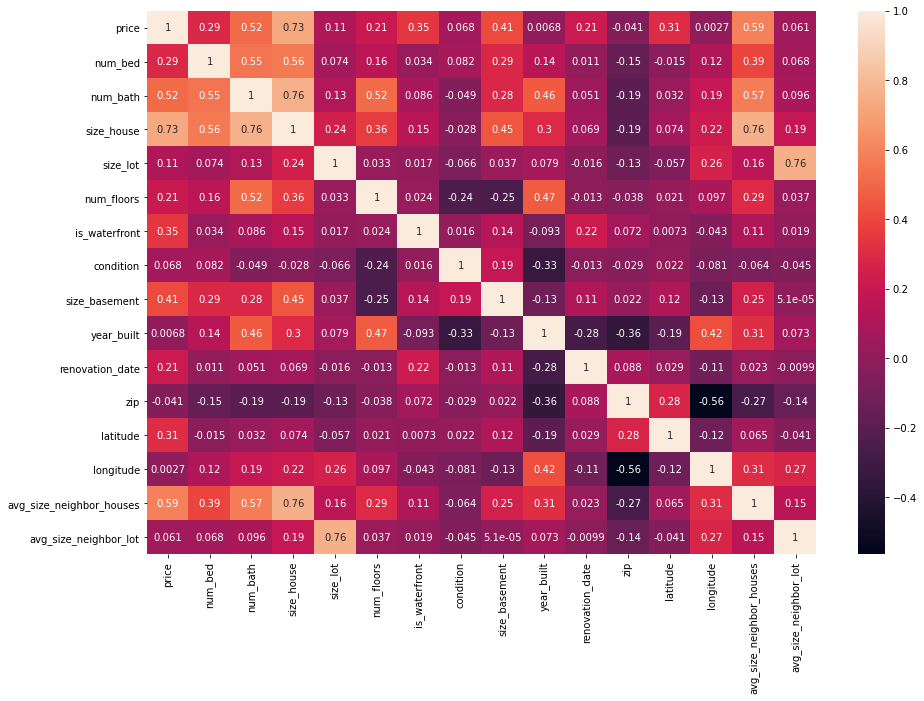

In [34]:
# matriz de correlação
plt.figure(figsize=(15,10))
sns.heatmap(df_train_houses.corr(), annot=True)
plt.show()

Vamos remover todas as features que não tem correlação estatisticamente significante.

In [35]:
# vamos manter essas
correlation_features



['price',
 'num_bed',
 'num_bath',
 'size_house',
 'size_lot',
 'num_floors',
 'condition',
 'size_basement',
 'renovation_date',
 'latitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot']

D:\Users\mario\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


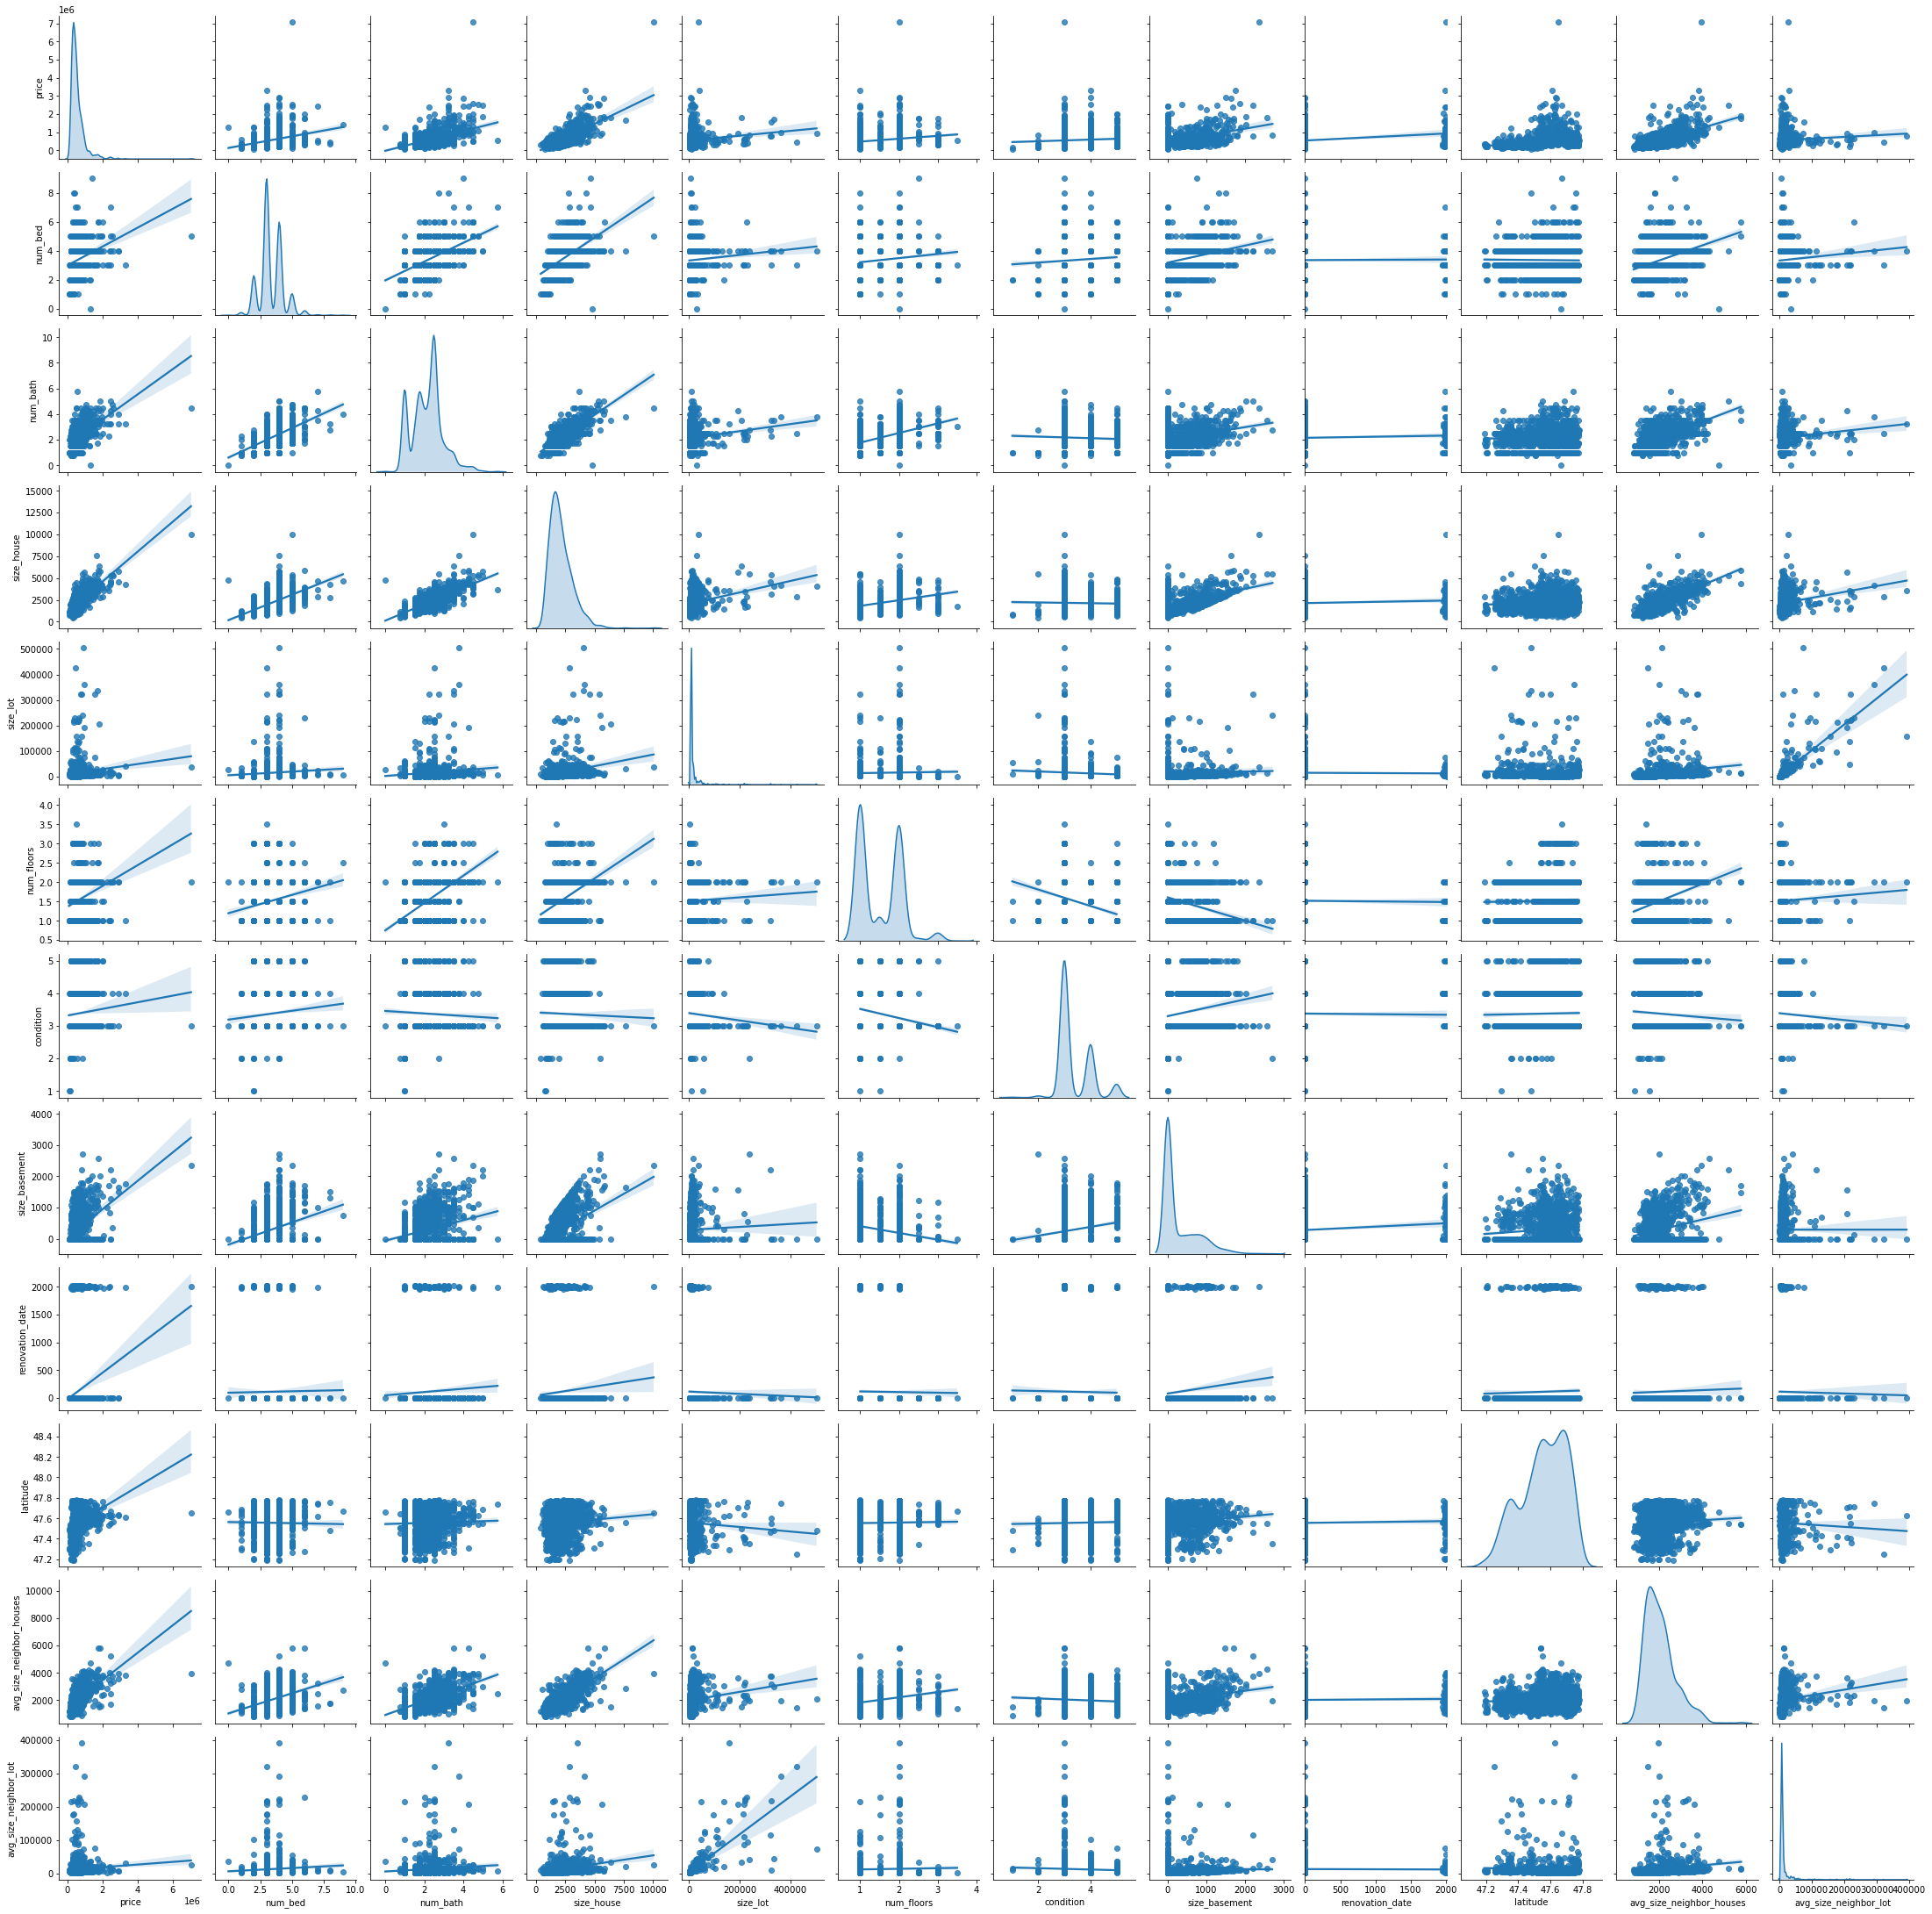

In [36]:
# pairplot
sns.pairplot(df_train_houses.loc[:,correlation_features], diag_kind='kde', kind='reg')
plt.show()

In [37]:
# avaliando zip
df_train_houses['zip'].unique()

array([98112, 98007, 98168, 98010, 98118, 98059, 98004, 98115, 98075,
       98072, 98008, 98166, 98109, 98038, 98102, 98045, 98053, 98117,
       98055, 98125, 98103, 98065, 98133, 98074, 98030, 98001, 98116,
       98126, 98144, 98027, 98022, 98002, 98042, 98034, 98155, 98014,
       98122, 98056, 98028, 98188, 98003, 98006, 98106, 98146, 98107,
       98031, 98058, 98019, 98077, 98023, 98108, 98177, 98040, 98029,
       98039, 98198, 98052, 98199, 98119, 98033, 98024, 98105, 98092,
       98178, 98005, 98136, 98011, 98070, 98148, 98032], dtype=int64)

A variável zip possui muitos níveis, poderíamos transformá-la em dummy, mas adicionaríamos muito preditores. Precisaríamos encontrar uma forma de agrupar esses dados. Porém, já seria um step de feature engineering, o qual ainda não estudamos. Por enquanto, vamos nos limitar a não utilizar essa variável.

In [35]:
#Quando códigos postais, em geral, é possível agregar reduzindo uma casa numérica.
#df_train_houses['zip_group'] = df_train_houses.zip.astype(str).str[:4]
#zip_group = df_train_houses.groupby('zip_group').aggregate({'price':"mean", 'zip_group':'count'}).sort_values(by='price', ascending=False)
#zip_group

# Modelagem e Avaliação dos Resultados

Nessa fase, espera-se que você crie o modelo com as variáveis que foram selecionadas e avalie o modelo checando os critérios que estudamos:
- Multicolinearidade
- Homocedasticidade dos resíduos
- Autocorrelação dos Resíduos
- Média 0 nos resíduos
- Estatística F
- P-valores
- MAE, MAPE, MSE, R2

Chequem esses tópicos e comentem os resultados.

Dica: Tentem remover a multicolinearidade primeiro usando a análise de VIF.  Depois ajustem um modelo com as features que sobraram e analisem os demais pontos. 

In [38]:
def mape(Y_real, y_previsto):
    return np.mean(abs(Y_real-y_previsto)/Y_real)

In [41]:
[variance_inflation_factor(df_train_houses.values, i) for i in range(len(df_train_houses.columns))]

[10.037047665320811,
 24.0988896592077,
 29.823835252872883,
 41.92994399011734,
 2.8988160733547534,
 17.833765833958893,
 1.2557242047602541,
 37.05472390678195,
 2.691718256180222,
 9188.303071371449,
 1.301487163593427,
 1777760.0069453816,
 156045.56049781456,
 1418407.66259916,
 23.74683021031636,
 2.935249246925599]

In [42]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = df_train_houses.columns 
  
# calculando VIF 
vif_data["VIF"] = [variance_inflation_factor(df_train_houses.values, i) for i in range(len(df_train_houses.columns))]
  
print(vif_data)

                     feature           VIF
0                      price  1.003705e+01
1                    num_bed  2.409889e+01
2                   num_bath  2.982384e+01
3                 size_house  4.192994e+01
4                   size_lot  2.898816e+00
5                 num_floors  1.783377e+01
6              is_waterfront  1.255724e+00
7                  condition  3.705472e+01
8              size_basement  2.691718e+00
9                 year_built  9.188303e+03
10           renovation_date  1.301487e+00
11                       zip  1.777760e+06
12                  latitude  1.560456e+05
13                 longitude  1.418408e+06
14  avg_size_neighbor_houses  2.374683e+01
15     avg_size_neighbor_lot  2.935249e+00


In [43]:
df_train_houses.drop(['year_built'], axis=1, inplace=True)
# VIF dataframe 
vif_data_year_built = pd.DataFrame() 
vif_data_year_built["feature"] = df_train_houses.columns 
  
# calculando VIF 
vif_data_year_built["VIF"] = [variance_inflation_factor(df_train_houses.values, i) for i in range(len(df_train_houses.columns))] 
  
print(vif_data_year_built)

                     feature           VIF
0                      price  9.832428e+00
1                    num_bed  2.378854e+01
2                   num_bath  2.644818e+01
3                 size_house  4.192403e+01
4                   size_lot  2.897039e+00
5                 num_floors  1.732156e+01
6              is_waterfront  1.254672e+00
7                  condition  3.427609e+01
8              size_basement  2.687134e+00
9            renovation_date  1.173750e+00
10                       zip  1.613857e+06
11                  latitude  1.526419e+05
12                 longitude  1.355397e+06
13  avg_size_neighbor_houses  2.337448e+01
14     avg_size_neighbor_lot  2.934902e+00


D:\Users\mario\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
df_train_houses.drop(['size_house'], axis=1, inplace=True)
# VIF dataframe 
vif_data_year_built = pd.DataFrame() 
vif_data_year_built["feature"] = df_train_houses.columns 
  
# calculando VIF 
vif_data_year_built["VIF"] = [variance_inflation_factor(df_train_houses.values, i) for i in range(len(df_train_houses.columns))] 
  
print(vif_data_year_built)

                     feature           VIF
0                      price  7.198776e+00
1                    num_bed  2.124722e+01
2                   num_bath  2.333240e+01
3                   size_lot  2.838668e+00
4                 num_floors  1.665603e+01
5              is_waterfront  1.233068e+00
6                  condition  3.405528e+01
7              size_basement  2.348482e+00
8            renovation_date  1.168082e+00
9                        zip  1.559000e+06
10                  latitude  1.477332e+05
11                 longitude  1.328023e+06
12  avg_size_neighbor_houses  1.887911e+01
13     avg_size_neighbor_lot  2.933955e+00


D:\Users\mario\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
df_train_houses.drop(['condition'], axis=1, inplace=True)
# VIF dataframe 
vif_data_year_built = pd.DataFrame() 
vif_data_year_built["feature"] = df_train_houses.columns 
  
# calculando VIF 
vif_data_year_built["VIF"] = [variance_inflation_factor(df_train_houses.values, i) for i in range(len(df_train_houses.columns))] 
  
print(vif_data_year_built)

                     feature           VIF
0                      price  7.120106e+00
1                    num_bed  2.105499e+01
2                   num_bath  2.333239e+01
3                   size_lot  2.827931e+00
4                 num_floors  1.611645e+01
5              is_waterfront  1.232591e+00
6              size_basement  2.340373e+00
7            renovation_date  1.164217e+00
8                        zip  1.556768e+06
9                   latitude  1.477150e+05
10                 longitude  1.324699e+06
11  avg_size_neighbor_houses  1.871537e+01
12     avg_size_neighbor_lot  2.931017e+00


D:\Users\mario\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
df_train_houses.drop(['num_bath'], axis=1, inplace=True)
# VIF dataframe 
vif_data_year_built = pd.DataFrame() 
vif_data_year_built["feature"] = df_train_houses.columns 
  
# calculando VIF 
vif_data_year_built["VIF"] = [variance_inflation_factor(df_train_houses.values, i) for i in range(len(df_train_houses.columns))] 
  
print(vif_data_year_built)

                     feature           VIF
0                      price  6.810304e+00
1                    num_bed  1.769350e+01
2                   size_lot  2.825379e+00
3                 num_floors  1.166084e+01
4              is_waterfront  1.225852e+00
5              size_basement  2.179161e+00
6            renovation_date  1.164208e+00
7                        zip  1.538472e+06
8                   latitude  1.466672e+05
9                  longitude  1.313978e+06
10  avg_size_neighbor_houses  1.805498e+01
11     avg_size_neighbor_lot  2.930516e+00


D:\Users\mario\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
df_train_houses.drop(['longitude'], axis=1, inplace=True)
# VIF dataframe 
vif_data_year_built = pd.DataFrame() 
vif_data_year_built["feature"] = df_train_houses.columns 
  
# calculando VIF 
vif_data_year_built["VIF"] = [variance_inflation_factor(df_train_houses.values, i) for i in range(len(df_train_houses.columns))] 
  
print(vif_data_year_built)

                     feature            VIF
0                      price       6.672784
1                    num_bed      17.689450
2                   size_lot       2.803717
3                 num_floors      11.657060
4              is_waterfront       1.222590
5              size_basement       2.127793
6            renovation_date       1.162566
7                        zip  145602.378485
8                   latitude  145565.922270
9   avg_size_neighbor_houses      16.865880
10     avg_size_neighbor_lot       2.910874


D:\Users\mario\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
df_train_houses.drop(['latitude'], axis=1, inplace=True)
# VIF dataframe 
vif_data_year_built = pd.DataFrame() 
vif_data_year_built["feature"] = df_train_houses.columns 
  
# calculando VIF 
vif_data_year_built["VIF"] = [variance_inflation_factor(df_train_houses.values, i) for i in range(len(df_train_houses.columns))] 
  
print(vif_data_year_built)

                    feature        VIF
0                     price   5.879297
1                   num_bed  17.614119
2                  size_lot   2.785052
3                num_floors  11.647784
4             is_waterfront   1.197410
5             size_basement   2.127423
6           renovation_date   1.158587
7                       zip  20.800301
8  avg_size_neighbor_houses  16.748835
9     avg_size_neighbor_lot   2.904396


D:\Users\mario\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
df_train_houses.drop(['zip'], axis=1, inplace=True)
# VIF dataframe 
vif_data_year_built = pd.DataFrame() 
vif_data_year_built["feature"] = df_train_houses.columns 
  
# calculando VIF 
vif_data_year_built["VIF"] = [variance_inflation_factor(df_train_houses.values, i) for i in range(len(df_train_houses.columns))] 
  
print(vif_data_year_built)

                    feature        VIF
0                     price   5.694683
1                   num_bed  12.450456
2                  size_lot   2.784804
3                num_floors   9.665874
4             is_waterfront   1.197356
5             size_basement   2.117566
6           renovation_date   1.150219
7  avg_size_neighbor_houses  15.403464
8     avg_size_neighbor_lot   2.904140


D:\Users\mario\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
df_train_houses.drop(['avg_size_neighbor_houses'], axis=1, inplace=True)
# VIF dataframe 
vif_data_year_built = pd.DataFrame() 
vif_data_year_built["feature"] = df_train_houses.columns 
  
# calculando VIF 
vif_data_year_built["VIF"] = [variance_inflation_factor(df_train_houses.values, i) for i in range(len(df_train_houses.columns))] 
  
print(vif_data_year_built)

                 feature       VIF
0                  price  4.530201
1                num_bed  9.512995
2               size_lot  2.784679
3             num_floors  8.473415
4          is_waterfront  1.187981
5          size_basement  2.106615
6        renovation_date  1.143752
7  avg_size_neighbor_lot  2.881754


D:\Users\mario\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
X = df_train_houses.drop(['price'], axis=1)
Y = df_train_houses['price']
X = sm.add_constant(X)
modelo_linear_multiplo = sm.OLS(Y,X)
modelo_linear_multiplo = modelo_linear_multiplo.fit()

In [62]:
print(modelo_linear_multiplo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     110.3
Date:                Fri, 27 Nov 2020   Prob (F-statistic):          1.63e-126
Time:                        20:38:47   Log-Likelihood:                -18232.
No. Observations:                1291   AIC:                         3.648e+04
Df Residuals:                    1283   BIC:                         3.652e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.152e+

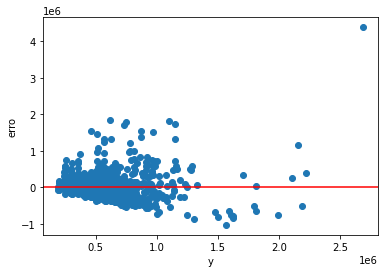

In [63]:
erro = (Y-modelo_linear_multiplo.predict(X))
plt.scatter(modelo_linear_multiplo.predict(X), erro)
plt.axhline(0, color='r')
plt.xlabel('y')
plt.ylabel('erro')
plt.show()

In [64]:
Y_log = np.log(Y)
modelo_linear_multiplo_log = sm.OLS(Y_log,X)
modelo_linear_multiplo_log = modelo_linear_multiplo_log.fit()

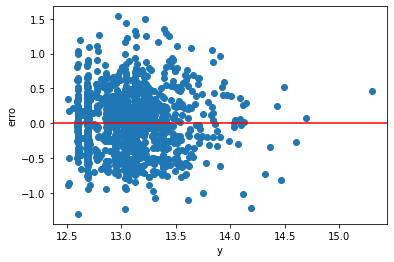

In [65]:
erro = (Y_log-modelo_linear_multiplo_log.predict(X))
plt.scatter(modelo_linear_multiplo_log.predict(X), erro)
plt.axhline(0, color='r')
plt.xlabel('y')
plt.ylabel('erro')
plt.show()